In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Input, Concatenate, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from sklearn import model_selection
import re

In [33]:
# train_data = pd.read_json('train_meta_data.json')
# test_data = pd.read_json('test_meta_data.json')
meta_data = pd.read_json('Movie_Metadata.json')

X = meta_data.drop(columns=['Title', 'Budget', 'Status', 'Released', 'Language', 'Director', 'Actors'])
y = meta_data['Status']

# X_train = train_data.drop(columns=['Title', 'Budget', 'Status', 'Released', 'Language', 'Director', 'Actors'])
# y_train = train_data['Status']
# X_test = test_data.drop(columns=['Title', 'Budget', 'Status', 'Released', 'Language', 'Director', 'Actors'])
# y_test = test_data['Status']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)


def preprocess_text(sen):
    sentence = re.sub(r'[^\w]', ' ', sen)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [34]:
token = Tokenizer()
token.fit_on_texts(X_train['Awards'])
max_length_awards = max([len(s) for s in X_train['Awards']])

train_awards_sequences = token.texts_to_sequences(X_train['Awards'])
train_awards_padded = pad_sequences(train_awards_sequences, maxlen=max_length_awards)
awards_vocab_size = len(token.word_index)+1

test_awards_sequences = token.texts_to_sequences(X_test['Awards'])
test_awards_padded = pad_sequences(test_awards_sequences, maxlen=max_length_awards)

input_awards = Input(shape=(max_length_awards,))
embedding_layer = Embedding(awards_vocab_size, max_length_awards)(input_awards)
LSTM_Layer_1 = Bidirectional(LSTM(64, dropout=0.2))(embedding_layer)
dence_Layer_1 = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01))(LSTM_Layer_1)

In [35]:
X_train_genre = []
data = list(X_train["Genre"])

for sen in data:
    X_train_genre.append(preprocess_text(sen))

X_test_genre = []
data = list(X_test["Genre"])

for sen in data:
    X_test_genre.append(preprocess_text(sen))

token.fit_on_texts(X_train_genre)
max_length_genre = max([len(s) for s in X_train_genre])

train_genre_sequences = token.texts_to_sequences(X_train_genre)
train_genre_padded = pad_sequences(train_genre_sequences, maxlen=max_length_genre)
genre_vocab_size = len(token.word_index)+1

test_genre_sequences = token.texts_to_sequences(X_test_genre)
test_genre_padded = pad_sequences(test_genre_sequences, maxlen=max_length_genre)

input_genre = Input(shape=(max_length_genre,))
embedding_layer = Embedding(genre_vocab_size, max_length_genre)(input_genre)
LSTM_Layer_2 = Bidirectional(LSTM(64, dropout=0.2))(embedding_layer)
dence_Layer_2 = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-6))(LSTM_Layer_2)

In [36]:
X_train_rating = X_train['imdbRating']
# X_train_rating=X_train_rating.astype(str)
# token.fit_on_texts(X_train_rating)
# max_length_rating = max([len(s) for s in X_train_rating])

# train_rating_sequences = token.texts_to_sequences(X_train_rating)
# train_rating_padded = pad_sequences(train_rating_sequences, maxlen=max_length_rating)

# rating_vocab_size = len(token.word_index)+1

X_test_rating = X_test['imdbRating']
# X_test_rating=X_test_rating.astype(str)
# test_rating_sequences = token.texts_to_sequences(X_test_rating)
# test_rating_padded = pad_sequences(test_rating_sequences, maxlen=max_length_rating)

input_rating = Input(shape=1)
dense_layer_3 = Dense(10, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(input_rating)
dense_layer_4 = Dense(200, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(dense_layer_3)
dense_layer_5 = Dense(10, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(dense_layer_4)

In [37]:
X_train_postive_ratio = X_train['Postive_ratio']
# X_train_postive_ratio=X_train_rating.astype(str)
# token.fit_on_texts(X_train_postive_ratio)
# max_length_postive_ratio = max([len(s) for s in X_train_postive_ratio])

# train_postive_ratio_sequences = token.texts_to_sequences(X_train_postive_ratio)
# train_postive_ratio_padded = pad_sequences(train_postive_ratio_sequences, maxlen=max_length_postive_ratio)

# postive_ratio_vocab_size = len(token.word_index)+1

X_test_postive_ratio = X_test['Postive_ratio']
# X_test_postive_ratio = X_test_postive_ratio.astype(str)
# test_postive_ratio_sequences = token.texts_to_sequences(X_test_postive_ratio)
# test_postive_ratio_padded = pad_sequences(test_postive_ratio_sequences, maxlen=max_length_postive_ratio)

input_postive_ratio = Input(shape=1)
dense_layer_6 = Dense(10, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(input_postive_ratio)
dense_layer_7 = Dense(200, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(dense_layer_6)
dense_layer_8 = Dense(10, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(dense_layer_7)

In [38]:
X_train_negative_ratio = X_train['Negative_ratio']
# X_train_negative_ratio=X_train_rating.astype(str)
# token.fit_on_texts(X_train_negative_ratio)
# max_length_negative_ratio = max([len(s) for s in X_train_negative_ratio])

# train_negative_ratio_sequences = token.texts_to_sequences(X_train_negative_ratio)
# train_negative_ratio_padded = pad_sequences(train_negative_ratio_sequences, maxlen=max_length_negative_ratio)

# negative_ratio_vocab_size = len(token.word_index)+1

X_test_negative_ratio = X_test['Negative_ratio']
# X_test_negative_ratio = X_test_negative_ratio.astype(str)
# test_negative_ratio_sequences = token.texts_to_sequences(X_test_negative_ratio)
# test_negative_ratio_padded = pad_sequences(test_negative_ratio_sequences, maxlen=max_length_negative_ratio)

input_negative_ratio = Input(shape=1)
dense_layer_9 = Dense(10, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(input_negative_ratio)
dense_layer_10 = Dense(200, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(dense_layer_9)
dense_layer_11 = Dense(10, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(dense_layer_10)

In [48]:
from tensorflow.python.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss')
concat_layer = Concatenate()([dence_Layer_1, dence_Layer_2, dense_layer_5, dense_layer_8, dense_layer_11])
dense_layer_6 = Dense(500, activation='relu',kernel_regularizer=regularizers.l2(1e-6))(concat_layer)
dense_layer_7 = Dense(10, activation='relu',kernel_regularizer=regularizers.l2(1e-6))(dense_layer_6)
output = Dense(1, activation='sigmoid')(dense_layer_7)
model = Model(inputs=[input_awards, input_genre, input_rating, input_postive_ratio, input_negative_ratio], outputs=output)
model.summary()
# dot_img_file = 'model_1.png'
# tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 68)]         0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 57)]         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 1)]          0                                            
____________________________________________________________________________________________

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [54]:
history = model.fit([train_awards_padded, train_genre_padded, X_train_rating, X_train_postive_ratio, X_train_negative_ratio],
                    y_train, epochs=11, batch_size=20, validation_data= ([test_awards_padded, test_genre_padded, 
                                                                          X_test_rating, X_test_postive_ratio, 
                                                                          X_test_negative_ratio], y_test), 
                    )

Epoch 1/11
21/21 [==============================] - 2s 77ms/step - loss: 0.3154 - accuracy: 0.8803 - val_loss: 0.7287 - val_accuracy: 0.7129
Epoch 2/11
21/21 [==============================] - 2s 77ms/step - loss: 0.3102 - accuracy: 0.8828 - val_loss: 0.6645 - val_accuracy: 0.7228
Epoch 3/11
21/21 [==============================] - 2s 78ms/step - loss: 0.3030 - accuracy: 0.8728 - val_loss: 0.7384 - val_accuracy: 0.6931
Epoch 4/11
21/21 [==============================] - 2s 77ms/step - loss: 0.3115 - accuracy: 0.8878 - val_loss: 0.7732 - val_accuracy: 0.7129
Epoch 5/11
21/21 [==============================] - 2s 89ms/step - loss: 0.2894 - accuracy: 0.8903 - val_loss: 0.7457 - val_accuracy: 0.7327
Epoch 6/11
21/21 [==============================] - 2s 104ms/step - loss: 0.2964 - accuracy: 0.8753 - val_loss: 0.7554 - val_accuracy: 0.7129
Epoch 7/11
21/21 [==============================] - 2s 87ms/step - loss: 0.2946 - accuracy: 0.8653 - val_loss: 0.8303 - val_accuracy: 0.6931
Epoch 8/11
2

In [51]:
score = model.evaluate(x=[test_awards_padded, test_genre_padded, X_test_rating, X_test_postive_ratio, X_test_negative_ratio],
                       y=y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1]*100)

4/4 [==============================] - 0s 17ms/step - loss: 0.7024 - accuracy: 0.7228
Test Score: 0.7023651003837585
Test Accuracy: 72.27723002433777


In [52]:
from sklearn.metrics import f1_score

x=[test_awards_padded, test_genre_padded, X_test_rating, X_test_postive_ratio, X_test_negative_ratio]
y_pred = model.predict(x)

m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_test, y_pred, sample_weight=None)
print('Accuracy %s' % m.result().numpy())

m = tf.keras.metrics.Precision()
m.update_state(y_test, y_pred, sample_weight=None)
print('Precission %s' % m.result().numpy())

m = tf.keras.metrics.Recall()
m.update_state(y_test, y_pred, sample_weight=None)
print('Recall %s' % m.result().numpy())

yhat_probs = model.predict(x, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs,axis=1)

f1 = f1_score(y_test, yhat_classes, average = 'weighted')
print('F1 score: %f' % f1)

Accuracy 0.7227723
Precission 0.44117647
Recall 0.625
F1 score: 0.659584


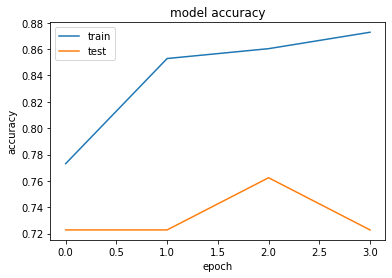

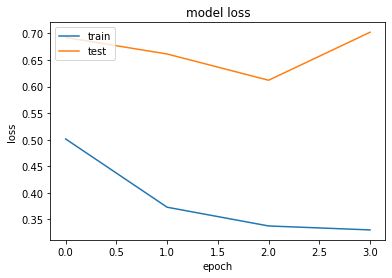

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()